# Finals Data

Given that not all teams made it to the finals, the focus is to see how they each contributed to a champion's success. Another feature of interest is the years of playoff experience. 

Need to still visualize and understand season's data to see where team ranks in offensive and defensive measures.

In [2]:
#modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats

%matplotlib inline

In [3]:
#get finals data for players and coaches
players = pd.read_csv('players_trim.csv', index_col='Unnamed: 0').reset_index(drop=True)
coaches = pd.read_csv('coaches.csv', index_col='Unnamed: 0').reset_index(drop=True)
print('players:', players.shape)
print('coaches:', coaches.shape)

#separate finals data for later
player_finals = players[(players['Champ']==1) | (players['Runner-Up']==1)]
coach_finals = coaches[(coaches['Champ']==1) | (coaches['Runner-Up']==1)]
print('\nplayers finals:', player_finals.shape)
print('coaches finals:', coach_finals.shape)

#features for each table
print('\nPlayer features:\n', player_finals.columns.values)
print('\nCoach features:\n', coach_finals.columns.values)

players: (6076, 32)
coaches: (332, 26)

players finals: (352, 32)
coaches finals: (21, 26)

Player features:
 ['Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA' '3P%'
 '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST' 'STL'
 'BLK' 'TOV' 'PF' 'PTS' 'Year' 'Champ' 'Runner-Up']

Coach features:
 ['Coach' 'Team' 'F-Seasons' 'Car-Seasons' 'CR-G' 'CR-W' 'CR-L' 'FR-G'
 'FR-W' 'FR-L' 'Car-G' 'Car-W' 'Car-L' 'Car-W%' 'CP-G' 'CP-W' 'CP-L'
 'FP-G' 'FP-W' 'FP-L' 'Car.P-G' 'Car.P-W' 'Car.P-L' 'Year' 'Champ'
 'Runner-Up']


In [4]:
#split features
player_num_features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
player_cat_features = ['Player', 'Pos', 'Tm', 'Year', 'Champ', 'Runner-Up']

coach_num_features = ['F-Seasons', 'Car-Seasons', 'CR-G', 'CR-W', 'CR-L', 'FR-G', 'FR-W', 'FR-L', 'Car-G', 'Car-W', 'Car-L', 'Car-W%', 'CP-G', 'CP-W', 'CP-L', 'FP-G', 'FP-W', 'FP-L', 'Car.P-G', 'Car.P-W', 'Car.P-L']
coach_cat_features = ['Coach', 'Team', 'Year', 'Champ', 'Runner-Up']

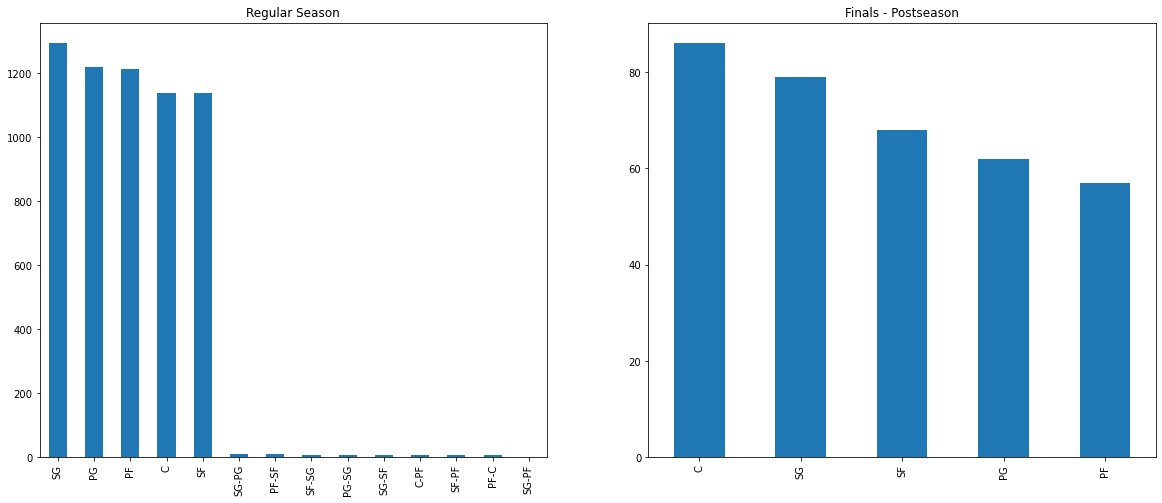

In [5]:
#position distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
pd.value_counts(players['Pos']).plot.bar(ax=ax1)
pd.value_counts(player_finals['Pos']).plot.bar(ax=ax2)
ax1.set_title('Regular Season')
ax2.set_title('Finals - Postseason')
plt.show()

In [6]:
player_finals[player_num_features].describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,299.000000,...,340.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,28.278409,49.872159,22.840909,19.074148,3.016193,6.379830,0.460199,0.731534,1.964205,0.310388,...,0.738512,0.780398,2.628125,3.403977,1.809375,0.603693,0.438920,1.082386,1.631250,8.080398
std,4.436547,25.533133,29.009532,9.807006,2.459737,4.882035,0.089763,0.860994,2.101396,0.159383,...,0.149785,0.686323,1.894009,2.415604,1.887233,0.467597,0.546047,0.839466,0.725239,6.774398
min,19.000000,1.000000,0.000000,2.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,26.000000,0.750000,10.400000,1.275000,2.900000,0.414000,0.000000,0.100000,0.268500,...,0.658500,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.500000,1.100000,3.375000
50%,28.000000,57.000000,6.000000,18.250000,2.300000,4.900000,0.463000,0.500000,1.500000,0.351000,...,0.765000,0.600000,2.100000,2.650000,1.200000,0.500000,0.300000,0.800000,1.600000,5.950000
75%,32.000000,73.000000,50.250000,26.950000,3.800000,8.200000,0.514250,1.100000,3.100000,0.400500,...,0.837500,1.100000,3.400000,4.400000,2.300000,0.800000,0.600000,1.500000,2.100000,10.225000
max,39.000000,82.000000,82.000000,42.000000,10.500000,21.500000,0.800000,5.100000,11.700000,1.000000,...,1.000000,4.000000,8.600000,11.300000,9.800000,2.300000,6.000000,4.200000,6.000000,30.100000


***My initial assumption*** was that we would have five unique values (PG, SG, SF, PF, C). However, there are players that play multiple roles consistently throughout the season. Given this, I'm going to add a class for whether it is a frontcourt or backcourt player. There is still the issue of intersections as we have players in the SF-SG and SG-PF bars.

**Decision so far** Data exploration focused on just the finals teams for the last ten years.

### Positions:
Shooters are generally guards (or so we think). Want to see how the finals players highest scores and number of players are distributed by position.

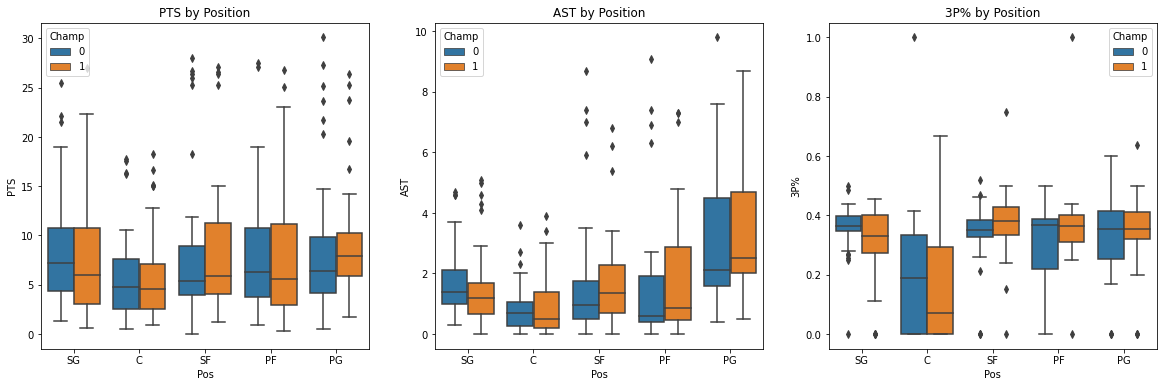

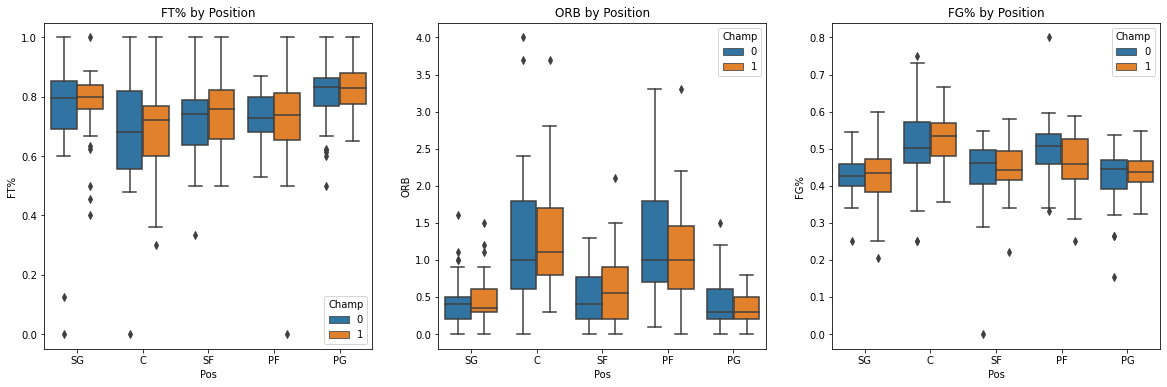

In [41]:
#plot
offense = ['PTS', 'AST', '3P%', 'FT%', 'ORB', 'FG%']
fig1, ([ax1, ax2, ax3]) = plt.subplots(ncols=3, figsize=(20,6))
for i, a in zip(offense[0:3], [ax1, ax2, ax3]):
    a.set_title(i+' by Position')
    sns.boxplot(x='Pos', y=i, data=player_finals, hue='Champ', ax=a)
fig2, ([ax1, ax2, ax3]) = plt.subplots(ncols=3, figsize=(20,6))
for i, a in zip(offense[3:6], [ax1, ax2, ax3]):
    a.set_title(i+' by Position')
    sns.boxplot(x='Pos', y=i, data=player_finals, hue='Champ', ax=a)
plt.show()

## Offense observations:
Bla bla bla bla 
abla '  
blacblabva 

nvldkvnskvnsf

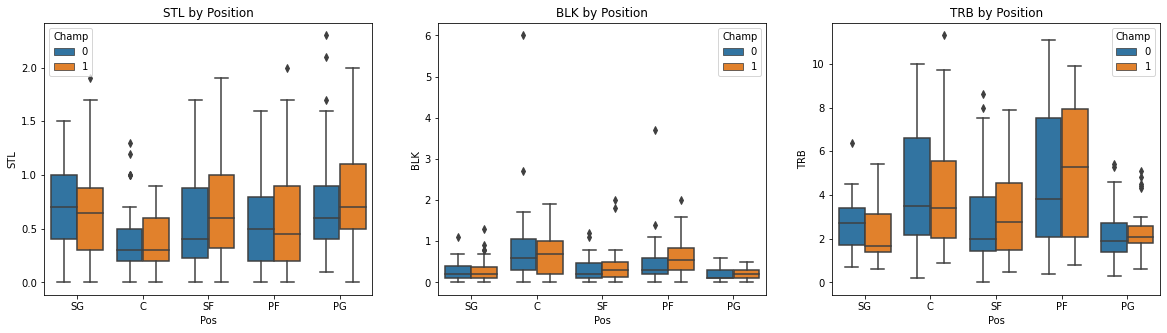

In [46]:
defense = ['STL', 'BLK', 'TRB']
fig, ([ax1, ax2, ax3]) = plt.subplots(ncols=3, figsize=(20,5))
for d, a in zip(defense, [ax1, ax2, ax3]):
    a.set_title(d+' by Position')
    sns.boxplot(x='Pos', y=d, data=player_finals, hue='Champ', ax=a)
plt.show()

## Defense observations:
Bla bla bla bla 
abla '  
blacblabva 

nvldkvnskvnsf


### Correlations between important features
Trying to decipher what is strongly correlated with wins and losses or winning a championship in this case using the features that are most identifiable as offensive and defensive measures. Instead of using FG% AND 3FG%, we will use the effective field goal percentage which accounts for a three pointer being worth more points than a two pointer (eFG%)

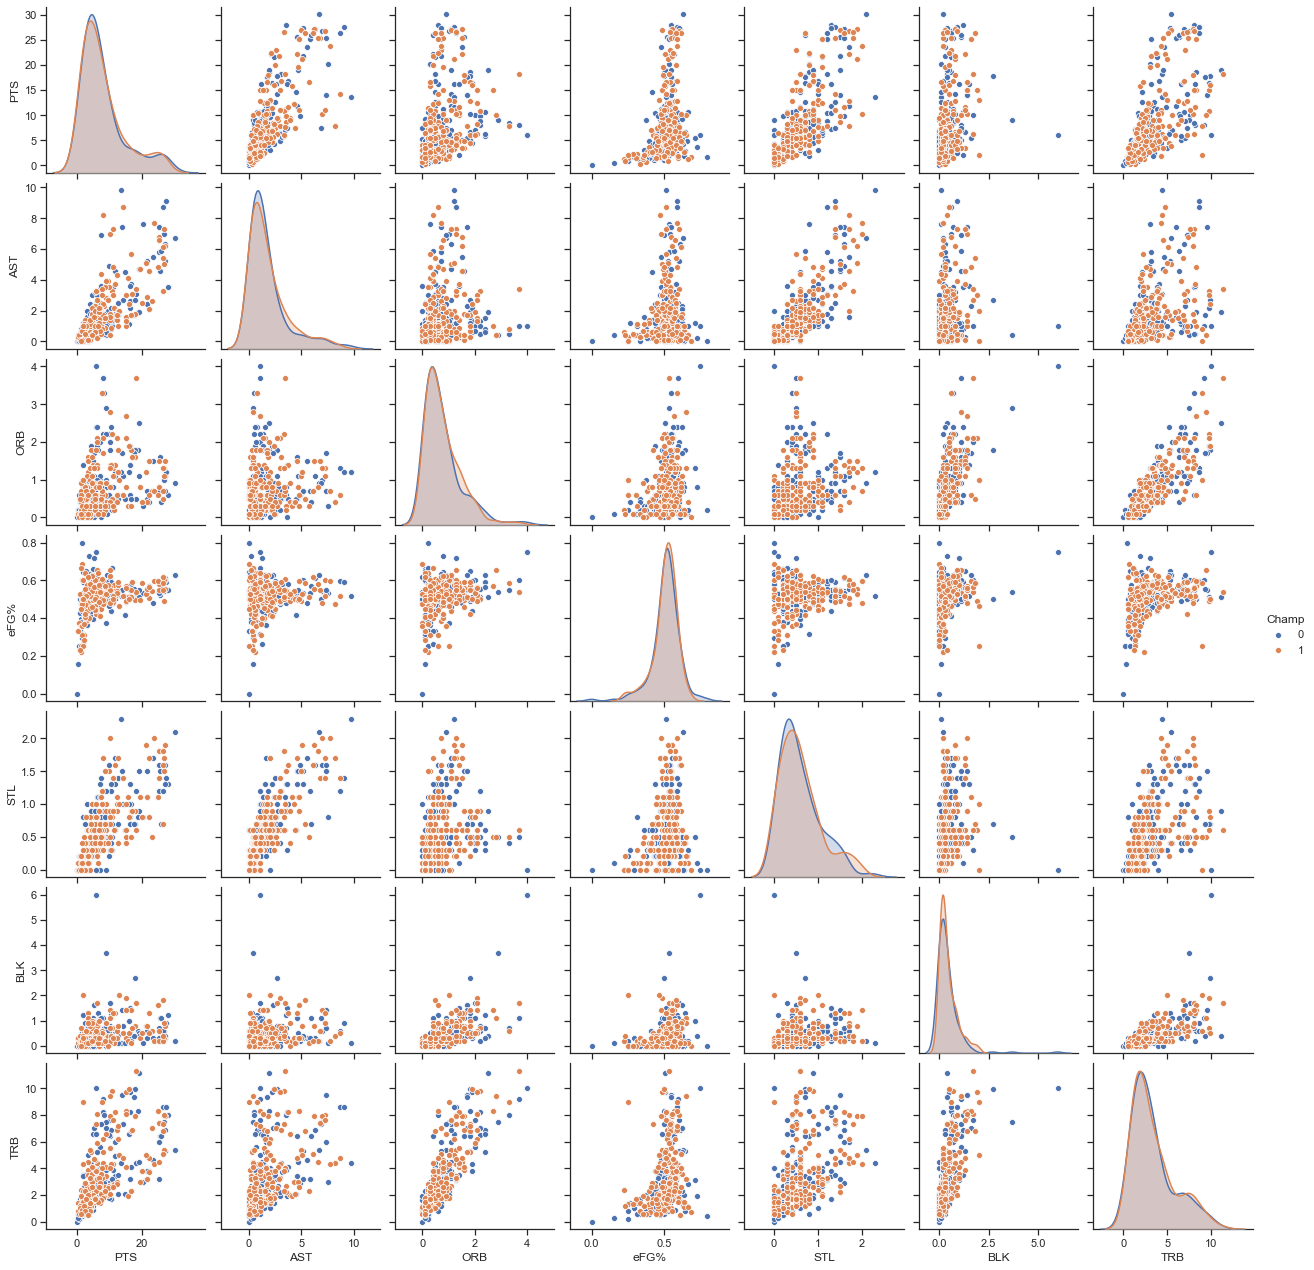

In [58]:
game_measures = ['PTS', 'AST', 'ORB', 'eFG%','STL', 'BLK', 'TRB', 'Champ']
sns.set(style='ticks', color_codes=True)
sns.pairplot(player_finals[game_measures], hue='Champ')
plt.show()

It seems when teams make it to the finals, they are mostly evenly matched in terms of scoring and defense measures. May be helpful to:
- Review all the teams and compare them to those that won
- Another approach would be to review the teams that made it to the playoffs against those that went to the finals
- A new feature that could be introduced is the number of years of experience for each player in the finals to see how this factors into performance